###### **1. IMPORTING ALL PYTHON LIBRARY THAT WE NEED**

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/brazilian-ecommerce/olist_customers_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_sellers_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_order_reviews_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_order_items_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_products_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_geolocation_dataset.csv
/kaggle/input/brazilian-ecommerce/product_category_name_translation.csv
/kaggle/input/brazilian-ecommerce/olist_orders_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_order_payments_dataset.csv


**2. READ ALL THE DATASET**

In [2]:
customer = pd.read_csv('../input/brazilian-ecommerce/olist_customers_dataset.csv')
geolocation = pd.read_csv('../input/brazilian-ecommerce/olist_geolocation_dataset.csv')
oitems = pd.read_csv('../input/brazilian-ecommerce/olist_order_items_dataset.csv')
opayments = pd.read_csv('../input/brazilian-ecommerce/olist_order_payments_dataset.csv')
oreview = pd.read_csv('../input/brazilian-ecommerce/olist_order_reviews_dataset.csv')
orders = pd.read_csv('../input/brazilian-ecommerce/olist_orders_dataset.csv')
products = pd.read_csv('../input/brazilian-ecommerce/olist_products_dataset.csv')
sellers = pd.read_csv('../input/brazilian-ecommerce/olist_sellers_dataset.csv')
pcategory = pd.read_csv('../input/brazilian-ecommerce/product_category_name_translation.csv')

**3. BUILDING THE NEWDATASET WITH SEVERAL SEGMENTATION**

**====SEGMENTATION BASED ON PRODUCTS DIMENSION====**

In [3]:
#merging dataset yang dibutuhkan untuk segmentasi
op = pd.merge(oitems, products)
opo = pd.merge(op, orders)

In [4]:
#mencari missing value
opo.isnull().sum(axis=0)

order_id                            0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
product_category_name            1603
product_name_lenght              1603
product_description_lenght       1603
product_photos_qty               1603
product_weight_g                   18
product_length_cm                  18
product_height_cm                  18
product_width_cm                   18
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1194
order_delivered_customer_date    2454
order_estimated_delivery_date       0
dtype: int64

**##Cleaning the missing value of column that we want to use**

In [5]:
#Membersihkan missing value untuk kolom yang akan digunakan sebagai attribute dataset baru
opo = opo[pd.notnull(opo['product_weight_g'])]
opo = opo[pd.notnull(opo['product_length_cm'])]
opo = opo[pd.notnull(opo['product_height_cm'])]
opo = opo[pd.notnull(opo['product_width_cm'])]
opo.isnull().sum(axis=0)

order_id                            0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
product_category_name            1586
product_name_lenght              1586
product_description_lenght       1586
product_photos_qty               1586
product_weight_g                    0
product_length_cm                   0
product_height_cm                   0
product_width_cm                    0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1194
order_delivered_customer_date    2454
order_estimated_delivery_date       0
dtype: int64

In [6]:
#MEmbuat kolom baru dengan fungsi operator sederhana
dp = opo[['customer_id', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'price']]
dp['product_dimension'] = (opo.product_length_cm * opo.product_height_cm * opo.product_width_cm)
dp.head()

,customer_id,product_weight_g,product_length_cm,product_height_cm,product_width_cm,price,product_dimension
0,3ce436f183e68e07877b285a838db11a,650.0,28.0,9.0,14.0,58.9,3528.0
1,e6eecc5a77de221464d1c4eaff0a9b64,650.0,28.0,9.0,14.0,55.9,3528.0
2,4ef55bf80f711b372afebcb7c715344a,650.0,28.0,9.0,14.0,64.9,3528.0
3,30407a72ad8b3f4df4d15369126b20c9,650.0,28.0,9.0,14.0,58.9,3528.0
4,91a792fef70ecd8cc69d3c7feb3d12da,650.0,28.0,9.0,14.0,58.9,3528.0


In [7]:
dp['product_dimension'].min()

168.0

In [8]:
dp['product_dimension'].max()

296208.0

In [9]:
dp['product_weight_g'].min()

0.0

In [10]:
dp['product_weight_g'].max()

40425.0

In [11]:
dp['price'].max()

6735.0

In [12]:
dp['price'].min()

0.85

In [13]:
#Mendefinisikan beberapa fungsi yang akan digunakan untuk membuat kolom baru 
def get_dimensions (dp):
    if dp['product_dimension'] > 148104:
        return 'Large'
    elif (dp['product_dimension'] <= 148104) and (dp['product_dimension'] > 37026):
        return 'Medium'
    elif dp['product_dimension'] <= 37026: 
        return 'Small'
def get_weight (dp):
    if dp['product_weight_g'] > 20212.5:
        return 'Heavy'
    elif (dp['product_weight_g'] <= 25265.625) and (dp['product_dimension'] > 15159.375):
        return 'Medium'
    elif dp['product_weight_g'] <= 15159.375: 
        return 'Light'
def price_class (dp):
     if dp['price'] >= 4209.375:
        return 'Expensive'
     elif (dp['price'] < 4209.375) and (dp['price'] >= 2525.625):
        return 'Intermediete'
     elif dp['price'] < 2525.625:
        return 'Cheap'
#Kolom baru yang akan mengaplikasikan fungsi yang dibuat sebelumnya
dp['product_size']=dp.apply(get_dimensions,axis=1)
dp['product_weight_segment']=dp.apply(get_weight,axis=1)
dp['price_class'] = dp.apply(price_class, axis=1)
dp = dp[['customer_id', 'product_dimension', 'product_size', 'product_weight_segment', 'price_class']]
size = pd.DataFrame(dp)
size.head()

,customer_id,product_dimension,product_size,product_weight_segment,price_class
0,3ce436f183e68e07877b285a838db11a,3528.0,Small,Light,Cheap
1,e6eecc5a77de221464d1c4eaff0a9b64,3528.0,Small,Light,Cheap
2,4ef55bf80f711b372afebcb7c715344a,3528.0,Small,Light,Cheap
3,30407a72ad8b3f4df4d15369126b20c9,3528.0,Small,Light,Cheap
4,91a792fef70ecd8cc69d3c7feb3d12da,3528.0,Small,Light,Cheap


**====Customer RFM(Recency, Frequency, Monetary) Segmentation====**

In [14]:
#merging dataset yang dibutuhkan untuk segmentasi
co = pd.merge(customer, orders)
cop = pd.merge (co, opayments)

In [15]:
#MENCARI MISSING VALUE
cop.isnull().sum(axis=0)

customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 175
order_delivered_carrier_date     1888
order_delivered_customer_date    3132
order_estimated_delivery_date       0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
dtype: int64

**#CLEAN THE MISSING VALUE#**

In [16]:
cop = cop[pd.notnull(cop['order_approved_at'])]
cop = cop[pd.notnull(cop['order_delivered_carrier_date'])]
cop = cop[pd.notnull(cop['order_delivered_customer_date'])]

In [17]:
cop.isnull().sum(axis=0)

customer_id                      0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
order_id                         0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
dtype: int64

In [18]:
cop['order_purchase_timestamp'].max()

'2018-08-29 15:00:37'

In [19]:
#mendefinisikan sebuah data yaitu tanggal paling terakhir orderan dibuat
import datetime as dt
now = dt.datetime(2018, 8, 30)
#mengubah tipe data pada kolom order_purchase_timestamp dari int menjadi date
cop['order_purchase_timestamp'] = pd.to_datetime(cop['order_purchase_timestamp'])

In [20]:
#perhitungan nilai RFM
rfmtable = cop.groupby('customer_id').agg({'order_purchase_timestamp': 
lambda x: (now - x.max()).days,'order_id': lambda x:len(x),
'payment_value':lambda x: x.sum()})
rfmtable['order_purchase_timestamp'] = rfmtable['order_purchase_timestamp'].astype(int)
rfmtable.rename(columns={'order_purchase_timestamp': 'Recency', 
                         'order_id': 'Frequency', 
                         'payment_value': 'Monetary'}, inplace=True)
rfmtable.head()

,Recency,Frequency,Monetary
customer_id,,,
00012a2ce6f8dcda20d059ce98491703,288,1,114.74
000161a058600d5901f007fab4c27140,409,1,67.41
0001fd6190edaaf884bcaf3d49edf079,547,1,195.42
0002414f95344307404f0ace7a26f1d5,378,1,179.35
000379cdec625522490c315e70c7a9fb,149,1,107.01


**===RFM SCORE CUSTOMER SEGMENTATION===**

In [21]:
#Menggunakan modul quantile untuk mendefinisikan fungsi dalam membuat rumus perhitungan RFM score cluster
quantiles = rfmtable.quantile(q=[0.25, 0.5, 0.75])
quantiles = quantiles.to_dict()
rfm_segment = rfmtable

In [22]:
#Membuat rumus perhitungan dari nilai RFM dengan iterasi dimana pada kode kali ini saya mengassign nilai hasil terbaik
#diwakilkan oleh nilai yang paling kecil
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [23]:
#Pengaplikasian fungsi sebelumnya untuk membuat kolom baru
rfm_segment['R'] = rfm_segment['Recency'].apply(RScore, args=('Recency',quantiles,))
rfm_segment['F'] = rfm_segment['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
rfm_segment['M'] = rfm_segment['Monetary'].apply(FMScore, args=('Monetary',quantiles,))
rfm_segment.head(3)

,Recency,Frequency,Monetary,R,F,M
customer_id,,,,,,
00012a2ce6f8dcda20d059ce98491703,288,1,114.74,3,4,2
000161a058600d5901f007fab4c27140,409,1,67.41,4,4,3
0001fd6190edaaf884bcaf3d49edf079,547,1,195.42,4,4,1


In [24]:
rfm_segment['RFMScore'] = rfm_segment.R.map(str) + rfm_segment.F.map(str) + rfm_segment.M.map(str)
rfm_segment['Score'] = rfm_segment[['R', 'F', 'M']].sum(axis=1)
rfm_segment.head(3)

,Recency,Frequency,Monetary,R,F,M,RFMScore,Score
customer_id,,,,,,,,
00012a2ce6f8dcda20d059ce98491703,288,1,114.74,3,4,2,342,9
000161a058600d5901f007fab4c27140,409,1,67.41,4,4,3,443,11
0001fd6190edaaf884bcaf3d49edf079,547,1,195.42,4,4,1,441,9


In [25]:
def level_customer(rfm_segment):
   if (rfm_segment['Score'] <=12) and (rfm_segment['Score'] > 9):
      return 'Bronze'
   elif (rfm_segment['Score'] <=9) and (rfm_segment['Score'] > 6):
      return 'Silver'
   elif (rfm_segment['Score'] <=6) and (rfm_segment['Score'] > 3):
      return 'Gold'
   elif rfm_segment['Score'] <= 3:
      return 'Platinum'
rfm_segment['CustomerLevel']=rfm_segment.apply(level_customer,axis=1)
rfm = pd.DataFrame(rfm_segment.reset_index())
rfm.head()

,customer_id,Recency,Frequency,Monetary,R,F,M,RFMScore,Score,CustomerLevel
0,00012a2ce6f8dcda20d059ce98491703,288,1,114.74,3,4,2,342,9,Silver
1,000161a058600d5901f007fab4c27140,409,1,67.41,4,4,3,443,11,Bronze
2,0001fd6190edaaf884bcaf3d49edf079,547,1,195.42,4,4,1,441,9,Silver
3,0002414f95344307404f0ace7a26f1d5,378,1,179.35,4,4,1,441,9,Silver
4,000379cdec625522490c315e70c7a9fb,149,1,107.01,2,4,2,242,8,Silver


**====Recreate Several Exist Column For Further Customer 360 Analysis====**

In [26]:
#Kolom yang sudah ada pada dataset sebelumnya yang masih akan digunakan untuk dataset baru
copo = pd.merge(cop, oreview)
copo = copo[['customer_id', 'customer_city', 'review_score', 'payment_type']]
copo = pd.DataFrame(copo)
copo.head()

,customer_id,customer_city,review_score,payment_type
0,06b8999e2fba1a1fbc88172c00ba8bc7,franca,4,credit_card
1,18955e83d337fd6b2def6b18a428ac77,sao bernardo do campo,5,credit_card
2,4e7b3e00288586ebd08712fdd0374a03,sao paulo,5,credit_card
3,b2b6027bc5c5109e529d4dc6358b12c3,mogi das cruzes,5,credit_card
4,4f2d8ab171c80ec8364f7c12e35b23ad,campinas,5,credit_card


**====Star Point Segmentation====**

In [27]:
def star_point(copo):
    if copo['review_score'] == 1:
        return '*'
    elif copo['review_score'] == 2:
        return '**'
    elif copo['review_score'] == 3:
        return '***'
    elif copo['review_score'] == 4:
        return '****'
    elif copo['review_score'] == 5:
        return '*****'
copo['Star_Rate'] = copo.apply(star_point, axis=1)
copo = pd.DataFrame(copo)
copo.head()

,customer_id,customer_city,review_score,payment_type,Star_Rate
0,06b8999e2fba1a1fbc88172c00ba8bc7,franca,4,credit_card,****
1,18955e83d337fd6b2def6b18a428ac77,sao bernardo do campo,5,credit_card,*****
2,4e7b3e00288586ebd08712fdd0374a03,sao paulo,5,credit_card,*****
3,b2b6027bc5c5109e529d4dc6358b12c3,mogi das cruzes,5,credit_card,*****
4,4f2d8ab171c80ec8364f7c12e35b23ad,campinas,5,credit_card,*****


**====CUSTOMER COHORT SEGEMENTATION====**

In [28]:
import datetime as dt
cop['order_purchase_timestamp'] = pd.to_datetime(cop['order_purchase_timestamp'])
def get_cohort(cop, period='M'):
    cop = cop[['customer_id', 'order_purchase_timestamp']].drop_duplicates()
    cop = cop.assign(acquisition_cohort = cop.groupby('customer_id')['order_purchase_timestamp'].transform('min').dt.to_period(period))
    cop = cop.assign(order_cohort = cop['order_purchase_timestamp'].dt.to_period(period))
    return cop
cop_df = get_cohort(cop, period='Q')
cop_df1 = cop_df[['customer_id', 'acquisition_cohort', 'order_cohort']]
cohort = pd.DataFrame(cop_df1)
cohort.head()

,customer_id,acquisition_cohort,order_cohort
0,06b8999e2fba1a1fbc88172c00ba8bc7,2017Q2,2017Q2
1,18955e83d337fd6b2def6b18a428ac77,2018Q1,2018Q1
2,4e7b3e00288586ebd08712fdd0374a03,2018Q2,2018Q2
3,b2b6027bc5c5109e529d4dc6358b12c3,2018Q1,2018Q1
4,4f2d8ab171c80ec8364f7c12e35b23ad,2018Q3,2018Q3


**====REASSEMBLE ALL SEGMENTATION INTO NEW DATASET====**

In [29]:
sc = pd.merge(size, cohort)
sr = pd.merge(sc, copo)
scr = pd.merge(sr, rfm).drop_duplicates()
scr.isnull().sum(axis=0)

customer_id                0
product_dimension          0
product_size               0
product_weight_segment    46
price_class                0
acquisition_cohort         0
order_cohort               0
customer_city              0
review_score               0
payment_type               0
Star_Rate                  0
Recency                    0
Frequency                  0
Monetary                   0
R                          0
F                          0
M                          0
RFMScore                   0
Score                      0
CustomerLevel              0
dtype: int64

In [30]:
scr = scr[pd.notnull(scr['product_weight_segment'])]
scr.head()

,customer_id,product_dimension,product_size,product_weight_segment,price_class,acquisition_cohort,order_cohort,customer_city,review_score,payment_type,Star_Rate,Recency,Frequency,Monetary,R,F,M,RFMScore,Score,CustomerLevel
0,3ce436f183e68e07877b285a838db11a,3528.0,Small,Light,Cheap,2017Q3,2017Q3,campos dos goytacazes,5,credit_card,*****,350,1,72.19,4,4,3,443,11,Bronze
1,e6eecc5a77de221464d1c4eaff0a9b64,3528.0,Small,Light,Cheap,2017Q2,2017Q2,jatai,5,boleto,*****,427,1,73.86,4,4,3,443,11,Bronze
2,4ef55bf80f711b372afebcb7c715344a,3528.0,Small,Light,Cheap,2018Q2,2018Q2,belo horizonte,4,credit_card,****,103,1,83.23,1,4,3,143,8,Silver
3,30407a72ad8b3f4df4d15369126b20c9,3528.0,Small,Light,Cheap,2017Q3,2017Q3,sao jose dos pinhais,5,credit_card,*****,393,1,75.07,4,4,3,443,11,Bronze
4,91a792fef70ecd8cc69d3c7feb3d12da,3528.0,Small,Light,Cheap,2017Q3,2017Q3,conselheiro lafaiete,5,credit_card,*****,384,1,72.19,4,4,3,443,11,Bronze


In [31]:
scr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100690 entries, 0 to 114821
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype        
---  ------                  --------------   -----        
 0   customer_id             100690 non-null  object       
 1   product_dimension       100690 non-null  float64      
 2   product_size            100690 non-null  object       
 3   product_weight_segment  100690 non-null  object       
 4   price_class             100690 non-null  object       
 5   acquisition_cohort      100690 non-null  period[Q-DEC]
 6   order_cohort            100690 non-null  period[Q-DEC]
 7   customer_city           100690 non-null  object       
 8   review_score            100690 non-null  int64        
 9   payment_type            100690 non-null  object       
 10  Star_Rate               100690 non-null  object       
 11  Recency                 100690 non-null  int64        
 12  Frequency               100690 non-null  int

**4. CUSTOMER 360 VIEW ANALYSIS AND VISUALIZATION**

**====Score Clustering====**

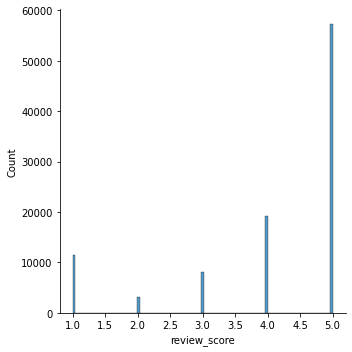

In [32]:
sns.displot(oreview['review_score'])

**====Most Favorable Payment Type====**

In [33]:
customerpay = cop[['customer_id','payment_type']].drop_duplicates()
customerpay.groupby(['payment_type']).agg('count').reset_index().sort_values('customer_id', ascending=False)

,payment_type,customer_id
1,credit_card,74302
0,boleto,19177
3,voucher,3679
2,debit_card,1484


**====City With The Most Customers====**

In [34]:
customercity = cop[['customer_id','customer_city']].drop_duplicates()
customercity = customercity.groupby(['customer_city']).agg('count').reset_index().sort_values('customer_id', ascending=False)
customercity.head()

,customer_city,customer_id
3563,sao paulo,15044
3126,rio de janeiro,6603
449,belo horizonte,2697
553,brasilia,2071
1135,curitiba,1489


**====Product Size Segmentation====**

In [35]:
productsize = dp[['customer_id','product_size']].drop_duplicates()
productsize.groupby(['product_size']).agg('count').reset_index().sort_values('customer_id', ascending=False)

,product_size,customer_id
2,Small,88469
1,Medium,10041
0,Large,417


**====Top 5 Best Customer Based On RFM Score====**

In [36]:
scr[scr['RFMScore']=='111'].sort_values('Monetary', ascending= False).head()

,customer_id,product_dimension,product_size,product_weight_segment,price_class,acquisition_cohort,order_cohort,customer_city,review_score,payment_type,Star_Rate,Recency,Frequency,Monetary,R,F,M,RFMScore,Score,CustomerLevel
104230,eb7a157e8da9c488cd4ddc48711f1097,220932.0,Large,Heavy,Intermediete,2018Q2,2018Q2,jundiai,5,credit_card,*****,85,2,4034.44,1,1,1,111,3,Platinum
105704,9cf0a858f5f153406bc333860eb23e22,2816.0,Small,Light,Cheap,2018Q3,2018Q3,sao paulo,4,voucher,****,13,2,2323.25,1,1,1,111,3,Platinum
105703,9cf0a858f5f153406bc333860eb23e22,2816.0,Small,Light,Cheap,2018Q3,2018Q3,sao paulo,4,credit_card,****,13,2,2323.25,1,1,1,111,3,Platinum
111571,466dcf5fcdc7c7a8a4bfebc7ce59b281,19950.0,Small,Medium,Cheap,2018Q3,2018Q3,ferraz de vasconcelos,1,voucher,*,12,2,2014.99,1,1,1,111,3,Platinum
111572,466dcf5fcdc7c7a8a4bfebc7ce59b281,19950.0,Small,Medium,Cheap,2018Q3,2018Q3,ferraz de vasconcelos,1,credit_card,*,12,2,2014.99,1,1,1,111,3,Platinum


**====RFM Distribution Visualization====**

<AxesSubplot:xlabel='Monetary', ylabel='Density'>

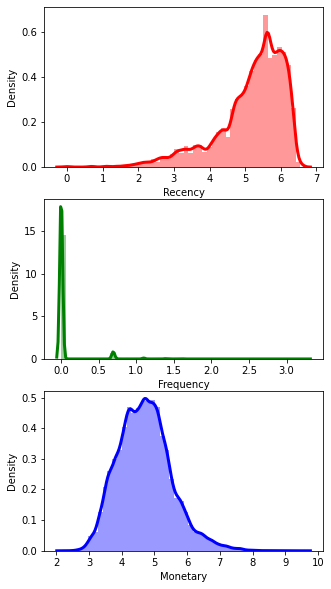

In [37]:
clustering = scr[['Recency',"Frequency","Monetary"]].copy()
def handle_o_n_min (num):
    if num <=1:
       return 1
    else:
       return num
clustering['Recency']=[handle_o_n_min(x) for x in clustering.Recency]
clustering['Monetary']=[handle_o_n_min(x) for x in clustering.Monetary]
clustering['Frequency']=[handle_o_n_min(x) for x in clustering.Frequency]
data_norm = clustering.apply(np.log,axis=1)
plt.figure(figsize=(5,10))
plt.subplot(3,1,1)
Recency_Plot = data_norm['Recency']
sns.distplot(Recency_Plot,kde_kws={"color":"r","lw":3},hist_kws={"color":"r"})
plt.subplot(3,1,2)
Frequency_Plot = data_norm.query('Frequency < 1000')['Frequency']
sns.distplot(Frequency_Plot,kde_kws={"color":"g","lw":3},hist_kws={"color":"g"})
plt.subplot(3,1,3)
Monetary_Plot = data_norm.query('Monetary< 10000')['Monetary']
sns.distplot(Monetary_Plot,kde_kws={"color":"b","lw":3},hist_kws={"color":"b"})

**====Customer Level Pie Chart Segmentation====**

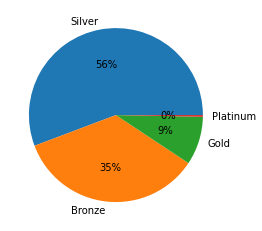

In [38]:
plt.pie(scr.CustomerLevel.value_counts(),
        labels=scr.CustomerLevel.value_counts().index,
        autopct='%.0f%%')
plt.show()

**===CUSTOMER COHORT ANALYSIS===**

In [39]:
import operator as op
def get_retention(cop, period='M'):
    cop = get_cohort(cop, period).groupby(['acquisition_cohort', 'order_cohort']).agg(customers=('customer_id', 'nunique')).reset_index(drop=False)
    cop['periods'] = (cop.order_cohort - cop.acquisition_cohort).apply(op.attrgetter('n'))
    return cop
retention = get_retention(cop)
retention.head()

,acquisition_cohort,order_cohort,customers,periods
0,2016-10,2016-10,270,0
1,2016-12,2016-12,1,0
2,2017-01,2017-01,748,0
3,2017-02,2017-02,1641,0
4,2017-03,2017-03,2546,0


In [40]:
def get_cohort_matrix(cop, period='M', percentage=False):
    cop = get_retention(cop, period).pivot_table(index = 'acquisition_cohort',
                                               columns = 'periods',
                                               values = 'customers')
    if percentage:
        cop = cop.divide(cop.iloc[:,0], axis=0)*100
    return cop
cop_matrix = get_cohort_matrix(cop, 'Q', percentage=True)
cop_matrix.head()

periods,0
acquisition_cohort,
2016Q4,100.0
2017Q1,100.0
2017Q2,100.0
2017Q3,100.0
2017Q4,100.0


In [41]:
ls = scr[scr['customer_id']== '001051abfcfdbed9f87b4266213a5df1']
ls

,customer_id,product_dimension,product_size,product_weight_segment,price_class,acquisition_cohort,order_cohort,customer_city,review_score,payment_type,Star_Rate,Recency,Frequency,Monetary,R,F,M,RFMScore,Score,CustomerLevel
73365,001051abfcfdbed9f87b4266213a5df1,9720.0,Small,Light,Cheap,2018Q2,2018Q2,sao paulo,4,voucher,****,91,3,65.2,1,1,3,113,5,Gold


**###CONCLUSIONS###**

* MAJORITY OF THE CUSTOMERS GIVE A 5 STARS FEEDBACK SCORE REVIEW
* THE MOST FAVORABLE PAYMENT TYPE IS USING CREDIT CARD
* THE CITY WITH MOST CUSTOMERS IS AT SAO PAOLO
* THE BEST CUSTOMER IS **eb7a157e8da9c488cd4ddc48711f1097**
* THERE IS NO SAME CUSTOMER THAT ORDER AGAIN WITHIN DIFFERENT PERIOD, ALL OF 
  THEM BUY DIFFERENT ITEM AT THE SAME PERIOD LIKE CUSTOMERS **001051abfcfdbed9f87b4266213a5df1**

Note: Untuk 1-3 merupakan tugas dalam membuat dataset, sedangkan 4 merupakan tambahan untuk analisa menggunakan seaborn dan matplotlib
Note tambahan: Disini saya menggunakan beberapa kolom yang sudah ada dari dataset sumber dikarenakan 
saya melihat kolom ini diperlukan untuk membuat customer 360 dataset seperti analisa yang 
sudah saya lakukan. Berdasarkan perintah tugas yang diberikan hanya mencantumkan untuk membuat 
customer 360 dataset dengan minimal 20 attribute tanpa mencantumkan attributenya harus baru atau tidak.
KAGGLE LINK: https://www.kaggle.com/code/adityanafrianda/03-aditya-nur-afrianda